In [1]:
import pandas as pd
import json
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [2]:
literal_path = r"C:\Users\oluwa\meta_Software.jsonl"

with open(literal_path) as j:
    for line in j:
        sft_ware = json.loads(line)

### load the dataset

In [3]:
df = pd.read_json('meta_Software.jsonl', lines=True) 
df.head(1)

main_category               title  average_rating  rating_number  \
0  Appstore for Android  Accupressure Guide             3.6            NaN   

                                            features  \
0  [All the pressing point has been explained wit...   

                                         description  price  \
0  [Acupressure technique is very ancient and ver...    0.0   

                                              images  \
0  [{'large': 'https://m.media-amazon.com/images/...   

                                      videos      store categories  \
0  [{'title': '', 'url': '', 'user_id': ''}]  mAppsguru         []   

                                             details parent_asin  \
0  {'Release Date': '2015', 'Date first listed on...  B00VRPSGEO   

   bought_together  subtitle  author  
0              NaN       NaN     NaN

### Getting to know more about the data

In [4]:
df.shape 

(89251, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89251 entries, 0 to 89250
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    87482 non-null  object 
 1   title            89251 non-null  object 
 2   average_rating   89226 non-null  float64
 3   rating_number    86292 non-null  float64
 4   features         89251 non-null  object 
 5   description      89251 non-null  object 
 6   price            70985 non-null  float64
 7   images           89251 non-null  object 
 8   videos           89251 non-null  object 
 9   store            89038 non-null  object 
 10  categories       89251 non-null  object 
 11  details          89251 non-null  object 
 12  parent_asin      89251 non-null  object 
 13  bought_together  0 non-null      float64
 14  subtitle         0 non-null      float64
 15  author           0 non-null      float64
dtypes: float64(6), object(10)
memory usage: 10.9+ MB


## Data Cleaning

### Drop rows where 'average_rating' is missing

In [6]:
df = df.dropna(subset=['average_rating'])

### cross Checking to see if there are missing values in 'average_rating' after dropping missing values

In [7]:
print(df['average_rating'].isnull().sum())

0


### Drop rows with empty category in the 'main_category' column

I changed my mind to drop rows that are empty in the main category instead of filling them with unknown because if they are not in any category, its basically doesnt help my research in any way. so its better i dropped them

In [8]:
df = df.dropna(subset=['main_category'])

### cross Checking to see if there are missing values in the 'main_category' column after dropping empty rows

In [9]:
print(df['main_category'].isnull().sum())

0


### Fill in missing rating numbers with 0

In [10]:
df = df.copy()

In [11]:
df['rating_number'] = df['rating_number'].fillna(0)

### cross Checking to see if there are missing values in 'rating-number' after replacing missing values with 0

In [12]:
print(df['rating_number'].isnull().sum())

0


### Drop columns 'bought_together','subtitle','author', 'price', 'store'. They all have missen data and not useful for my analysis

In [13]:
df = df.drop(columns = {'bought_together','subtitle','author', 'price', 'store'}) 

df.head(1)

main_category               title  average_rating  rating_number  \
0  Appstore for Android  Accupressure Guide             3.6            0.0   

                                            features  \
0  [All the pressing point has been explained wit...   

                                         description  \
0  [Acupressure technique is very ancient and ver...   

                                              images  \
0  [{'large': 'https://m.media-amazon.com/images/...   

                                      videos categories  \
0  [{'title': '', 'url': '', 'user_id': ''}]         []   

                                             details parent_asin  
0  {'Release Date': '2015', 'Date first listed on...  B00VRPSGEO

### cross checking the data to see if it is clean

In [14]:
df.isnull().sum()

main_category     0
title             0
average_rating    0
rating_number     0
features          0
description       0
images            0
videos            0
categories        0
details           0
parent_asin       0
dtype: int64

### count the number of main category

In [15]:
main_category_counts = df['main_category'].value_counts()
main_category_counts.head()

main_category
Appstore for Android    68654
Software                18791
Gift Cards                  4
Computers                   2
Home Audio & Theater        2
Name: count, dtype: int64

### laying foundation for bar chart

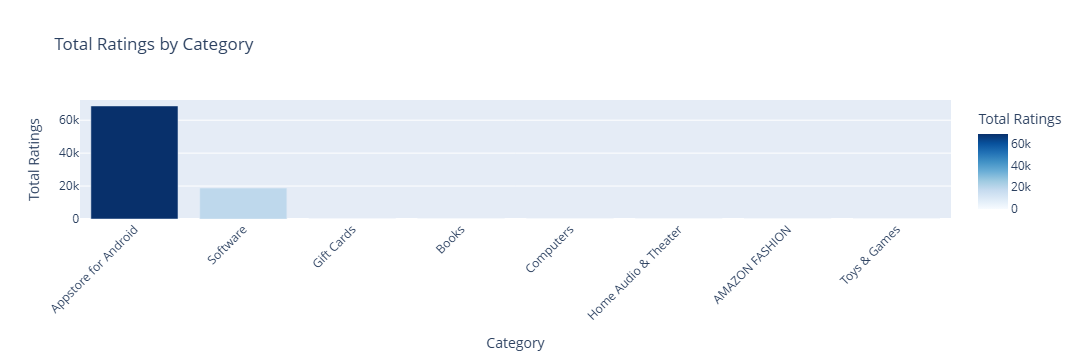

In [36]:
category_ratings = df.groupby('main_category')['rating_number'].size().sort_values(ascending=False).reset_index()

# Plotting with Plotly
fig = px.bar(category_ratings, x='main_category', y='rating_number', 
             title="Total Ratings by Category",
             labels={'main_category': 'Category', 'rating_number': 'Total Ratings'},
             color='rating_number',
             color_continuous_scale='Blues')

fig.update_layout(xaxis={'categoryorder': 'total descending'}, xaxis_tickangle=-45)
fig.show()

The histogram graph below shows that a few categories have more rating count than others. 'Appstore for Android' is more popular than other categories on the Amazon platform. it also has more number of reviews than other category. had to group averate rating and rating numbers so as to be able to plot the graph 

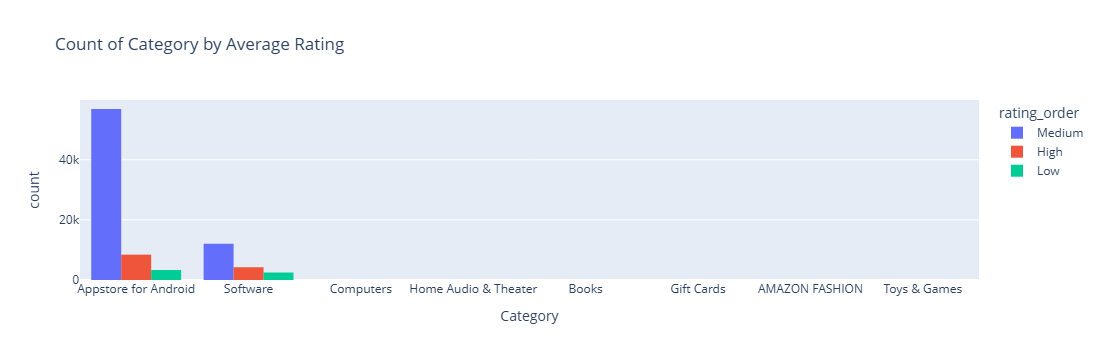

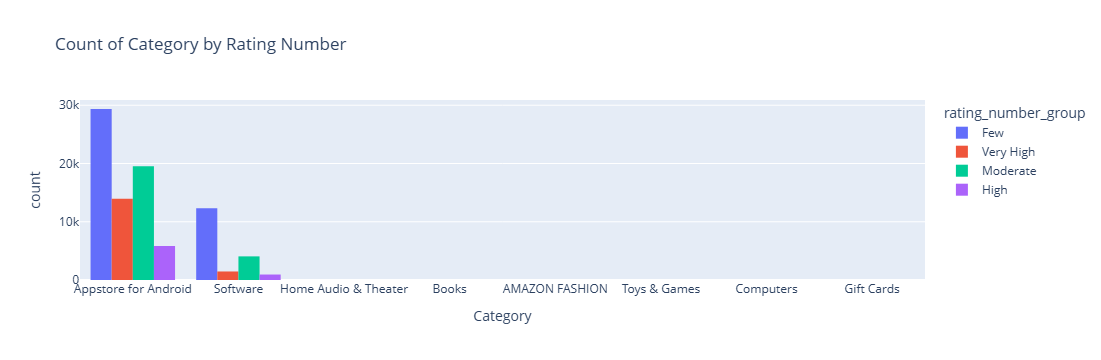

In [34]:
# Define bins and labels for average rating
bins = [0, 2, 4, 5]
labels = ['Low', 'Medium', 'High'] # Customize based on your data range
df['rating_order'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True)

# Define bins and labels for rating number
bins = [0, 10, 50, 100, df['rating_number'].max()]
labels = ['Few', 'Moderate', 'High', 'Very High'] # Customize based on your data range
df['rating_number_group'] = pd.cut(df['rating_number'], bins=bins, labels=labels, include_lowest=True)

# Category distribution by rating order 
fig1 = px.histogram(df, x="main_category", title="Count of Category by Average Rating",
                    labels={"main_category": "Category", "count": "Number of Ratings"},
                    color="rating_order", barmode='group')  # Set barmode to 'group'

# Category distribution by rating number
fig2 = px.histogram(df, x="main_category", title="Count of Category by Rating Number",
                    labels={"main_category": "Category", "count": "Number of Ratings"},
                    color="rating_number_group", barmode='group')  # Set barmode to 'group'

# Auto position the text labels
fig.update_traces(textposition='outside', textfont_size=12)
fig.update_layout(height=500)

# Display the plots
fig1.show()
fig2.show()

In [18]:
main_category_counts = df.groupby(['main_category', 'rating_order'], observed=True).size().unstack(fill_value=0)
main_category_counts

rating_order           Low  Medium  High
main_category                           
AMAZON FASHION           0       0     1
Appstore for Android  3325   56891  8438
Books                    0       2     0
Computers                0       2     0
Gift Cards               0       0     4
Home Audio & Theater     0       2     0
Software              2487   12060  4244
Toys & Games             0       0     1

In [20]:
main_category_counts = df['main_category'].value_counts()
main_category_counts.head()

main_category
Appstore for Android    68654
Software                18791
Gift Cards                  4
Computers                   2
Home Audio & Theater        2
Name: count, dtype: int64

In [21]:
bins = [0, 2, 4, 5]
labels = ['Low', 'Medium', 'High']
df['rating_order'] = pd.cut(df['average_rating'], bins=bins, labels=labels, include_lowest=True)

In [22]:
main_category_counts = df.groupby(['main_category', 'rating_order'], observed=True).size().unstack(fill_value=0)
main_category_counts

rating_order           Low  Medium  High
main_category                           
AMAZON FASHION           0       0     1
Appstore for Android  3325   56891  8438
Books                    0       2     0
Computers                0       2     0
Gift Cards               0       0     4
Home Audio & Theater     0       2     0
Software              2487   12060  4244
Toys & Games             0       0     1

In [23]:
rating_order = ['Low', 'Medium', 'High']
main_category_counts = main_category_counts[rating_order]

main_category_counts.head()

rating_order           Low  Medium  High
main_category                           
AMAZON FASHION           0       0     1
Appstore for Android  3325   56891  8438
Books                    0       2     0
Computers                0       2     0
Gift Cards               0       0     4

In [24]:
main_category_counts['Total']=main_category_counts.sum(axis=1)
main_category_counts_sorted=main_category_counts.sort_values(by='Total', ascending=False)
main_category_counts_sorted_top10=main_category_counts_sorted.head()
main_category_counts_sorted_top10.head()

rating_order           Low  Medium  High  Total
main_category                                  
Appstore for Android  3325   56891  8438  68654
Software              2487   12060  4244  18791
Gift Cards               0       0     4      4
Books                    0       2     0      2
Computers                0       2     0      2

In [25]:
category_names=main_category_counts_sorted_top10.index
total_rating=main_category_counts_sorted_top10['Total']

### Information contained in hover. When you hover over the different rating level, it makes you see how many they are

In [26]:
rating_info = [
    ('Low', '#FF0000', 'Low'),   # Red
    ('Medium', '#00FF00', 'Medium'),  # Green
    ('High', '#0000FF', 'High')  # Blue
]

traces=[]

# hover template property
for rating_name, color, hover_label in rating_info:
    if rating_name=='High':
        hovertemplate=f"<b>Total Medal:</b>" + total_rating.astype(str) + f"<br><b>{hover_label}:<b/> %{{y}}<extra></extra>"
        opacity=1
        line=dict(
        color='black',
        width=1.5
        )
    else:
        hovertemplate= f"<br><b>{hover_label}:<b/> %{{y}}<extra></extra>"
        opacity=1
        line=dict()

    traces.append(go.Bar(
        x=main_category_counts_sorted_top10.index,
        y=main_category_counts_sorted_top10[rating_name],
        name=rating_name.split()[0],
        hovertemplate=hovertemplate,
        marker=dict(
            color=color,
            opacity=opacity,
            line=line
            )
    )
)
        

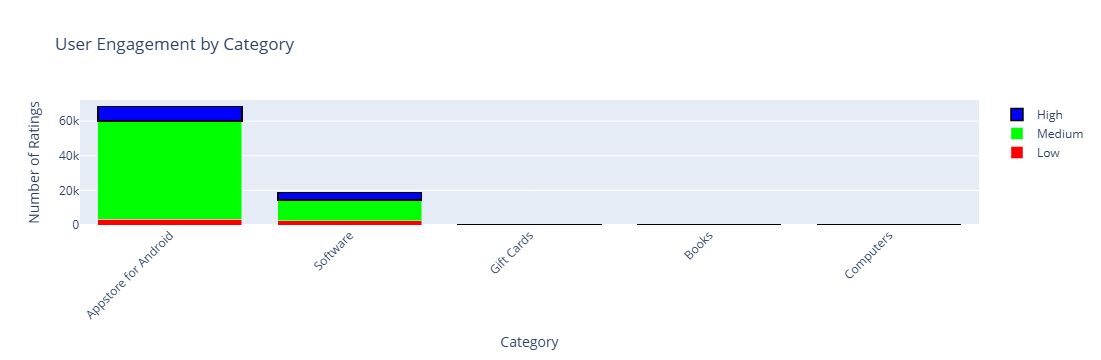

In [27]:
stacked_bar_fig=go.Figure(data=traces)

# add the bar chart properties
stacked_bar_fig.update_layout(
    barmode='stack',
    title="User Engagement by Category",
    xaxis_title="Category",
    yaxis_title="Number of Ratings",
    xaxis_tickangle=-45,
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Ariel"
    )
)

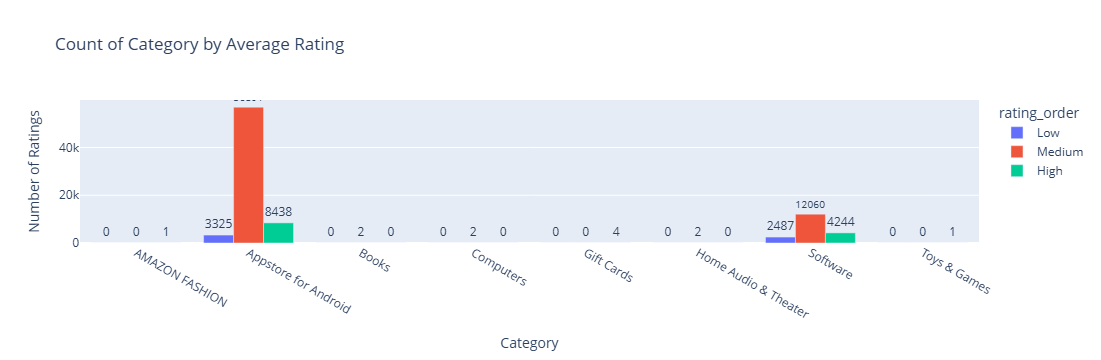

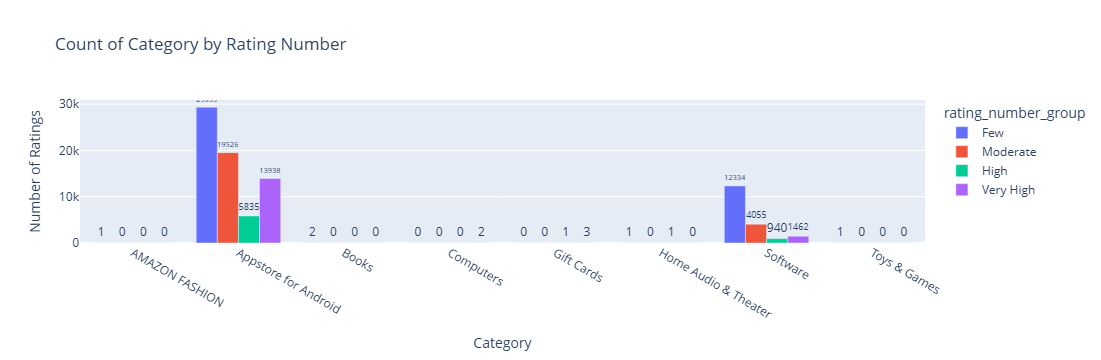

In [39]:
# Defined bins and create a grouped column
bins = [0, 10, 50, 100, df['rating_number'].max()]
labels = ['Few', 'Moderate', 'High', 'Very High']
df['rating_number_group'] = pd.cut(df['rating_number'], bins=bins, labels=labels, include_lowest=True)

# grouped data for each plot
category_ratings = df.groupby(['main_category', 'rating_order'], observed=False).size().reset_index(name='count')
category_rating_numbers = df.groupby(['main_category', 'rating_number_group'], observed=False).size().reset_index(name='count')

# Category distribution by rating order
fig1 = px.bar(
    category_ratings, 
    x="main_category", 
    y="count", 
    title="Count of Category by Average Rating",
    labels={"main_category": "Category", "count": "Number of Ratings"},
    color="rating_order", 
    barmode='group', 
    text='count'
)

# distribution by rating number 
fig2 = px.bar(
    category_rating_numbers, 
    x="main_category", 
    y="count", 
    title="Count of Category by Rating Number",
    labels={"main_category": "Category", "count": "Number of Ratings"},
    color="rating_number_group", 
    barmode='group', 
    text='count'
)

# position the text labels
fig1.update_traces(textposition='outside', textfont_size=12)
fig2.update_traces(textposition='outside', textfont_size=12)

# Adjust layout
fig1.update_layout(height=500)
fig2.update_layout(height=500)

# Display the plots
fig1.show()
fig2.show()

the above shows more information about the data and gave deep insight into it

### Project Milestone 2 Reflection
In Milestone 2, I created a new Jupyter Notebook and added code improvements to build on my work from Milestone 1. I noticed and corrected a few minor mistakes from Milestone 1 that made my code more streamlined and less complicated.

In Milestone 2, I began working with a cleaner dataset where I have:
Dropping the columns 'bought_together,' 'subtitle,' 'author,' 'price,' and 'store'
Dropping rows where 'main_category' is empty 
Filling missing 'rating_number' values with 0
Dropping rows where 'average_rating' is missing

I created a bar plot to show the counts for each 'main_category.' The plot shows that certain categories have higher counts than others, with 'Appstore for Android' being the most popular on the Amazon platform. Additionally, some entries lacked a category designation, so they were assigned to an "Unknown" category. I later dropped them because they showed no effect on my project.

I grouped 'average_rating' into levels: 0-2 as "Low," 2-4 as "Medium," and 4-5 as "High." I also grouped the rating number. I created an interactive stacked bar chart with 'average_rating', 'main_category', and 'rating_number'. However, this chart has been causing issues, as it slows down and occasionally crashes the Jupyter Notebook. Additionally, I will be working on the color and branding in milestone 3


